### Changing to the main directory

In [1]:
%cd ..

/home/isham/Desktop/machine-learning-projects/text-classification/few-shot-prompting-text-classification


/home/isham/anaconda3/envs/text-classification-using-llm/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Import Necessary Libraries

In [2]:
import pandas as pd
from utils import compute_multiclass_metrics, plot_confusion_matrix

In [3]:
final_output = pd.read_csv('data/news_category_classification/final_classified_outputs.csv')

In [4]:
final_output.sample(n=5, random_state=42)

,category,text,predicted_category_llama3,predicted_category_llama3:70b,predicted_category_mixtral,predicted_category_gpt-3.5-turbo,correct_category
361,tech,microsoft makes anti-piracy move microsoft say...,tech,tech,tech,tech,tech
73,sport,pearce keen on succeeding keegan joint assista...,sport,sport,sport,sport,sport
374,entertainment,blue beat u2 to top france honour irish band u...,entertainment,entertainment,entertainment,entertainment,entertainment
155,entertainment,school tribute for tv host carson more than 1 ...,entertainment,entertainment,entertainment,entertainment,entertainment
104,politics,kennedy s cautious optimism charles kennedy is...,politics,politics,politics,politics,politics


In [5]:
final_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   category                          500 non-null    object
 1   text                              500 non-null    object
 2   predicted_category_llama3         500 non-null    object
 3   predicted_category_llama3:70b     500 non-null    object
 4   predicted_category_mixtral        500 non-null    object
 5   predicted_category_gpt-3.5-turbo  500 non-null    object
 6   correct_category                  500 non-null    object
dtypes: object(7)
memory usage: 27.5+ KB


### Computation of Accuracy, Precision, Recall, and F1-Score

In [6]:
predicted_columns = final_output.columns.to_list()
predicted_columns.remove('category')
predicted_columns.remove('text')
predicted_columns.remove('correct_category')

In [7]:
predicted_columns

['predicted_category_llama3',
 'predicted_category_llama3:70b',
 'predicted_category_mixtral',
 'predicted_category_gpt-3.5-turbo']

In [8]:
true_category = final_output['correct_category'].to_list()
final_results = []
for column in predicted_columns:
    result = compute_multiclass_metrics(true_category, final_output[column].to_list())
    result['model'] = column.replace('predicted_category_', '')
    final_results.append(result)

final_results = pd.DataFrame(final_results)

Lets include approximate time taken too for inferencing 500 records by each of the models.

In [9]:
time_taken = [360, 720, 540, 900]
final_results['time_taken_in_seconds'] = time_taken

In [10]:
final_results

,accuracy,precision,recall,f1,model,time_taken_in_seconds
0,0.886,0.796789,0.894913,0.800293,llama3,360
1,0.976,0.981302,0.977032,0.978721,llama3:70b,720
2,0.914,0.827455,0.921479,0.843914,mixtral,540
3,0.962,0.805873,0.802064,0.803609,gpt-3.5-turbo,900


### Plotting Confusion Matrix

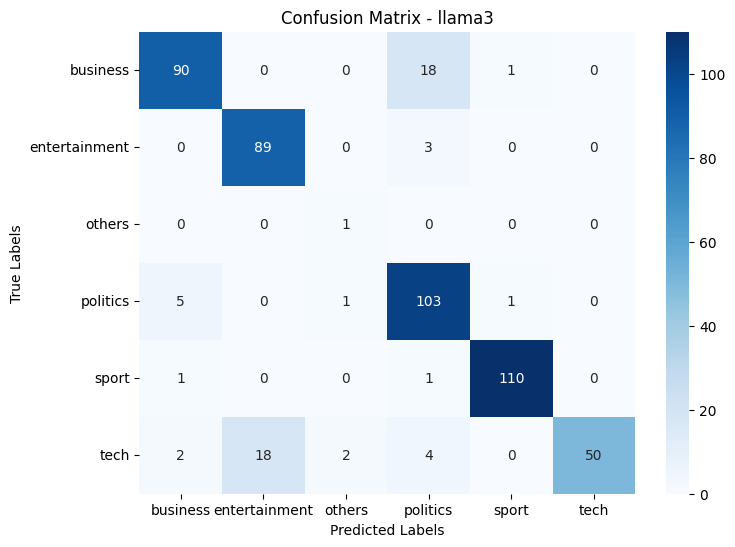

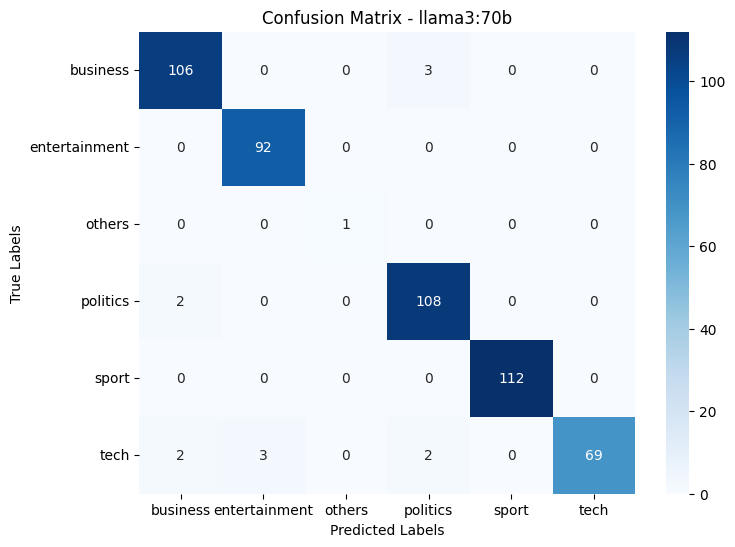

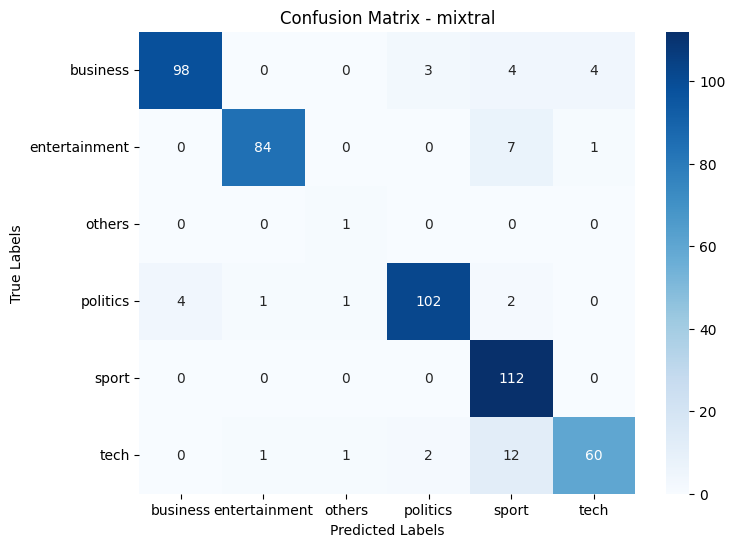

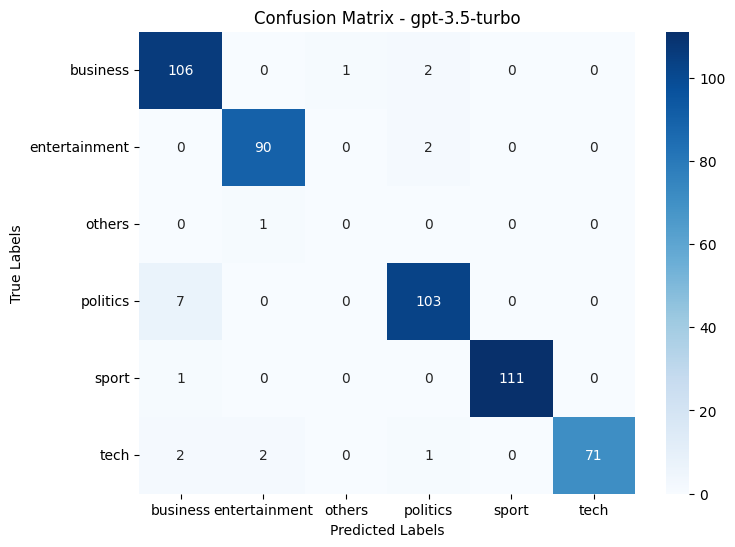

In [11]:
for column in predicted_columns:
    plot_confusion_matrix(true_category, final_output[column], column.replace('predicted_category_', ''))